# Vizualizácie pomocou knižnice Seaborn - cvičenie 1

Nasledujúce úlohy demonštrujú možnosti knižnice Seaborn pri rôznych spôsoboch vizualizácií premenných dátových rámcov Pandas. 

Na úvod importujeme knižnicu `Seaborn`. Rovnako importujeme knižnice pre prácu s dátovými rámcami `Pandas` a `Numpy` pre numerické operácie, ktoré budeme používať.

Príkaz `%matplotlib inline` nastaví vykresľovanie vizualizácií v rámci front-endu, ktorý používame (v našom prípade notebooky Jupyter) priamo, pod časťou spusteného kódu. Vizualizácie potom budú súčasťou notebooku. 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# inicializujeme knižnicu Seaborn
sns.set()

### Načítanie datasetu

Seaborn umožňuje použiť vstavanú funciu `load_dataset()` na načítanie štandardných dátových kolekcií z repozitáru príkladov knižnice. Dataset v taktomto prípade nenačítavame z disku, stiahne sa automaticky z repozitára a načíta sa ako štandardný dátový rámec. Túto funkciu je možné použiť pri analýze štandardných dátových kolekcií. Jediným parametrov tejto funkcie je názov datasetu, kompletný zoznam dátových množín, ktoré takto môžeme načítať nájdete [tu](https://github.com/mwaskom/seaborn-data).

V tomto tutoriáli budeme pracovať s datasetom `tips`. Tento jednoduchý dataset obsahuje údaje o veľkosti platieb a sprepitného v reštaurácii. Tie su charakterizované nasledujúcimi atribútmi:
* total_bill - výška celého účtu
* tip - výška sprepitného
* sex - pohlavie platcu účtu
* smoker - identifikuje, či platca je fajčiar alebo nie
* day - deň transakcie
* time - špecifikuje, či sa jednalo o večeru alebo obed
* size - veľkosť skupiny osôb


In [2]:
tips = sns.load_dataset('tips') # Z repozitára štandardných datasetov načítame dataset Tips

In [4]:
tips.head(10) # V premennej tips budeme mať načítaný dátový rámec, ktorého hlavičku môžeme vypísať príkazom head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Na Pandas dátový rámec môžeme aplikovať rôzne vizualizácie, ktoré poskytuje knižnica Seaborn. Na jednotlivé premenné sa odkazujeme pomocou názvu stĺpca v dátovom rámci. 

### Vizualizácie distribúcie hodnôt - numerické atribúty

Prvou skupinou vizualizácií pre numerické atribúty sú diagramy distribúcie hodnôt (vizualizácie histogramov pre kategorické atribúty si ukážeme neskôr pri `countplot()`). Pre ich vizualizáciu v knižnici Seaborn môžeme použiť vizualizáciu distribúcie hodnôt pomocou funkcie `distplot()`. Tá vykresľuje distribúciu hodnôt zvoleného atribútu, kde na x-ovej osi sú hodnoty zvoleného atribútu a na y-ovej osi ich distribúcia. 

Jediným povinným parametrom funkcie `distplot()` je pole alebo zoznam s hodnotami premennej. V prípade, že dáta máme načítané v dátovom rámci, budeme parameter špecifikovať ako `dátový_rámec['stĺpec']`. Funkcia potom použije názov stĺpca pre názov osi x. 

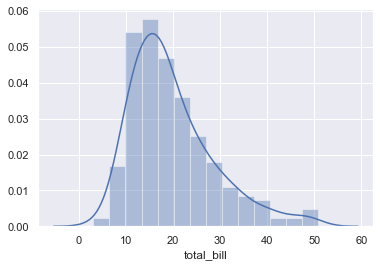

In [5]:
# Nasledujúcim príkazom vykreslíme graf rozdelenia hodnôt atribútu `total_bill` z dátového rámca tips

g = sns.distplot(tips['total_bill'])

Po vykreslení grafu vidíme distribúciu hodnôt atribútu `total_bill`. Všimnime si, že pre účely vykreslenia bol spojitý atribút diskretizovaný. Funkcia `distplot()` implicitne sama automaticky prepočítava vhodný počet intervalov. Okrem samotného histogramu, Seaborn implicitne okrem početnosti vykresľuje aj aproximáciu funkcie hustoty rozdelenia hodnôt. 

Samotný spôsob vykresľovania môžeme modifikovať, nastavovaním nepovinných parametrov. Tých je hneď niekoľko:
* `bins` - hodnota tohoto parametra určuje počet intervalov, ktoré sa použijú pri transformovaní spojitého atribútu pri vykresľovaní. Nadobúda hodnoty celých čísel. 
* `kde` - KDE (kernel density estimation), ďalší z rozširujúcich parametrov, ktorý vypína alebo zapína vykresľovanie aproximácie hustoty rozdelenia hodnôt. Jeho prednastavená hodnota je `True`, môžeme ho voliteľne vypnúť nastavením na hodnotu `False`.
* `rug` - zobrazenie datapointov na osi x (hodnoty `True` a `False`)
* `hist` - zobrazenie histogramu (hodnoty `True` a `False`)


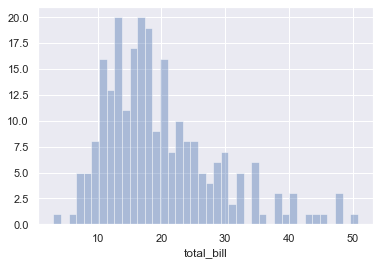

In [6]:
# Vykreslíme distplot() pre atribút total_bill z dátového rámca tips bez zobrazenia aproximácie, pri diskretizácii použijeme 40 intervalov

g = sns.distplot(tips['total_bill'],kde=False,bins=40) 

Rôznymi kombináciami parametrov môžeme vizualizovať rôzne kombinácie spôsobov vykresľovania distribúcie hodnôt jednej premennej. 

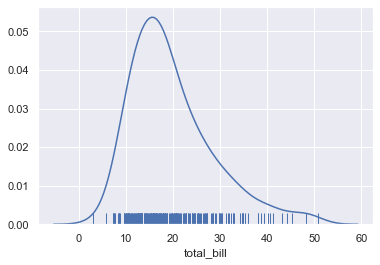

In [7]:
# Vykreslíme aproximáciu hustoty rozdelenia, s dátovými bodmi, bez histogramu

g = sns.distplot(tips['total_bill'],kde=True, hist=False, rug=True)

Ak chceme vykresliť distribúciu hodnôt iba pomocou KDE, môžeme použiť funkciu `kdeplot()`. 
Pomocou Seaborn zároveň môžeme vykresliť aj vizualizácie distribúcií hodnôt pre viacero atribútov súčasne. Tie sú potom farebne rozlíšené.

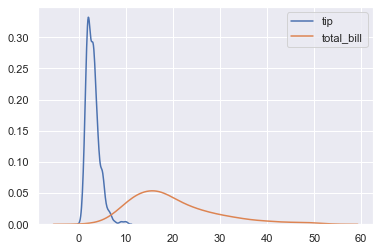

In [8]:
for col in ['tip', 'total_bill']:   # v jednoduchom cykle prejdeme cez všetky atribúty, ktoré chceme vykresliť
    sns.kdeplot(tips[col])          # pomocou kdeplot vykreslíme KDE krivku 

### Vizualizácie závislosti dvoch numerických premenných

#### Bodové grafy (Scatter plots)

Pre vizualizáciu závislosti hodnôt dvoch numerických atribútov môžeme použiť bodové grafy (scatter plots) pomocou funkcie knižnice Seaborn ``scatterplot()``. Funkcia má na vstupe 3 štandardné parametre:

* `x` - premenná, ktorá bude zobrazená na osi x 
* `y` - premenná, ktorá bude zobrazená na osi y
* `data` - dátový rámec vstupných dát

Obe analyzované premenné musia byť numerické. V týchto a nasledujúcich funkciách už premenné špecifikujeme len podľa názvu stĺpca v používanom dátovom rámci (ten sa tiež zvyčajne uvádza ako jeden z parametrov). Aj v tomto prípade, Seaborn použije názov dátového rámca pre označenie osí v grafe. 

Výstupom je graf, kde jednotlivé body zdpovedajú jednotlivým záznamom v dátovom rámci, resp. kombinácii hodnôt oboch sledovaných atribútov. 

Príklad nižšie zobrazí súvislosť medzi dvoma numerickými atribútmi. V tomto prípade poďme preskúmať vzťah medzi veľkosťou sprepitného `tip` a výškou účtu `total_bill` použitím bodového grafu. 

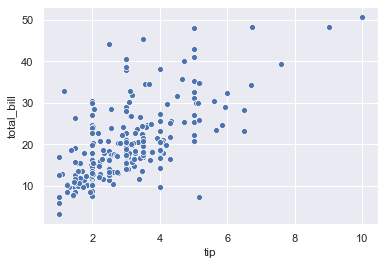

In [9]:
g = sns.scatterplot(x='tip', y='total_bill',data=tips) # Na osi x vynesieme hodnoty tip, na os y hodnoty total_bill a ako zdrojové dáta použijeme dátový rámec tips


Scatter plot je možné skombinovať aj s kategorickým atribútom. Môžeme tak vizuálne odlíšiť hodnoty kombinácie dvoch numerických atribútov pre špecifické hodnoty zvoleného kategorického atribútu. 

Ten do `scatterplot()` funkcie došpecifikujeme pomocou rozširujúceho parametra `hue`. Jeho hodnotu potom nastavíme na kategorický atribút, ktorý použijeme pre farebné rozlíšenie bodov vo vizualizácii. 

Povedzme, že chceme rozlíšiť farebne hodnoty kombinácií atribútov `tip` a `total_bill` podľa toho, či hosť bol fajčiar alebo nie.

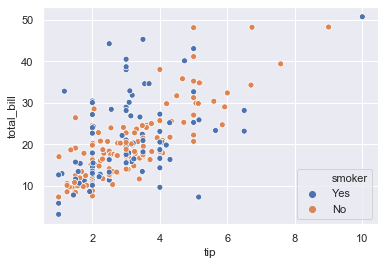

In [12]:
# Vykreslíme scatterplot ako v predošlom príklade, akurát pomocou hue parametra nastaveného na atribút 'smoker' farebne rozlíšime body

g = sns.scatterplot(x='tip', y='total_bill', hue='smoker', data=tips)

Ďaľšími parametrami, ktorými môžeme modifikovať vizualizáciu závislosti sú:
* `style`- ak chceme na rozlíšenie jednotlivých hodnôt kategorického atribútu použiť tvar bodov 
* `size` - ak chceme na rozlíšenie bodov použiť veľkosť spojitý atribút pomocou veľkosti jednotlivých bodov

Všetky vyššie uvedené spôsoby je možné navzájom kombinovať. V bodovom grafe potom budeme vedieť vykresliť závislosť dvoch numerických premenných v závislosti na viacerých kategorických alebo iných spojitých premenných. 

Príklad nižšie obohacuje predošlý graf o zobrazenie veľkosti skupiny (pomocou veľkosti jednotlivých bodov - parametrom `size`) a rozlíšením pohlavia (pomocou rôzneho tvaru bodov - parameter `style`).  

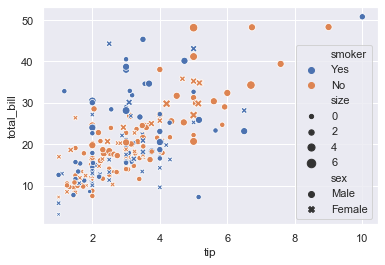

In [13]:
g = sns.scatterplot(x='tip', y='total_bill', hue='smoker', size='size', style='sex', data=tips)

#### Regresné grafy (Regression plots)

Bodový graf vieme doplniť aj o vizualizáciu lineárnej funkčnej závislosti skúmaných atribútov. Takúto vizualizáciu realizujeme pomocou funkcií `regplot()` alebo `lmplot()`. Funkcia používa rovnaké parametre ako funkcie ``scatterplot()`` a výsledný bodový graf je doplnený o vizualizáciu regresného modelu funkčnej závislosti premenných. 

V príklade nižšie vizualizujeme lineárnu závislosť medzi atribútmi `total_bill` a `tip`. V tomto prípade vizualizácia dáva zmysel - so zvyšujúcim sa účtom obvykle rastie aj výška sprepitného. 

Parametrami funkcie `regplot()` sú:
* `x` - premenná na osi x
* `y` - premenná na osi y
* `data` - dátový rámec

Rozširujúce parametre umožňujú nastaviť stupeň funkcie použitej pre modelovanie závislosti - implicitne je nastavená lineárna funkcia, parametrom `order` špecifikujeme stupeň polynómu.

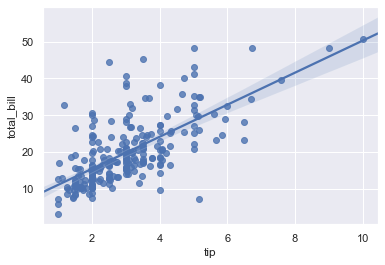

In [14]:
# Príklad nižšie zobrazuje zobrazuje kombináciu rovnakých premenných ako predošlé príklady

g = sns.regplot(x='tip',y='total_bill',data=tips)

Podobne ako predchádzaujúce spôsoby vizualizácie, aj `regplot` vieme doplniť o farebné rozlíšenie pomocou hodnôt zvoleného kategorického atribútu. Rovnako ako v predchádzajúcich príkladoch pomocou nastavenia parametra `hue`. 


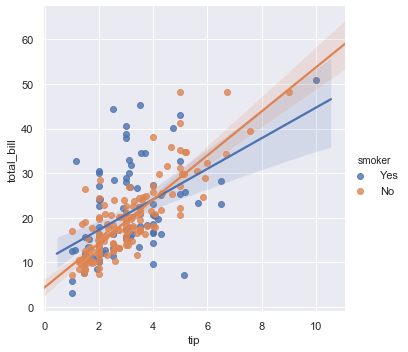

In [15]:
# Analogicky ako v príklade so scatterplot
# Graf rozlíšime pomocou parametra hue podľa hodnôt atribútu 'smoker'

g = sns.lmplot(x='tip',y='total_bill', hue='smoker', data=tips)

#### Kombinované vizualizácie - Joint plot

Vizualizácia pomocou funkcie `jointplot()` umožňuje vo všeobecnosti rozšíriť a skombinovať vizualizácie charakteristík samotných premenných spolu s vizualizáciou vzájomných charakteristík dvoch premenných. Parametrami tejto funkcie sú:

* `x` - názov prvej premennej 
* `y` - názov druhej premennej 
* `data` - dátový rámec vstupných dát
* `kind` - definuje typ kombinácie vizualizácií. Nadobúda hodnoty: `scatter`, `hex`, `reg`, `kde`. 

Pri jeho nastavení na hodnotu `scatter` dostaneme bodový graf ako pri `scatterplot()` skombinovaný s grafmi o distribúcii hodnôt oboch premenných (ako `distplot()`).

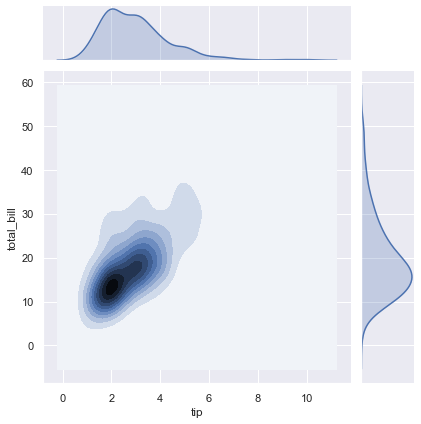

In [21]:
# Uvedený príklad skombinuje vizualizáciu kombinácii hodnôt dvoh atribútov tip a total_bill (ako scatterplot)
# Dopĺňa ich potom o vizualizácie distribúcií hodnôt (ako distplot)

g = sns.jointplot(x='tip', y='total_bill',data=tips, kind='kde')

#### Úloha 9.1

Vyskúšajte nastaviť rôzne hodnoty parametra `kind` a porovnajte jednotlivé spôsoby vykresľovania. 

In [ ]:
# YOUR CODE HERE

#### Kombinované vizualizácie - Párový graf

Párový graf umožňuje vizualizovať naraz vzájomné kombinácie všetkých numerických atribútov naprieč celým dátovým rámcom. Výsledkom je matica grafov, kde mimo diagonál zobrazujeme vizualizácie vzájomných kombinácií jednotlivých atribútov. Na diagonále sa implicitne zobrazujú distribpcie hodnôt daného atribútu.  

Funkcia `pairplot()` požaduje iba jediný povinný parameter - zdrojový dátový rámec.

Ak chceme vykresliť párový diagram iba pre zvolené stĺpce, môžeme ich predtým špecifikovať do poľa, ktoré predáme funkcii ako parameter. 

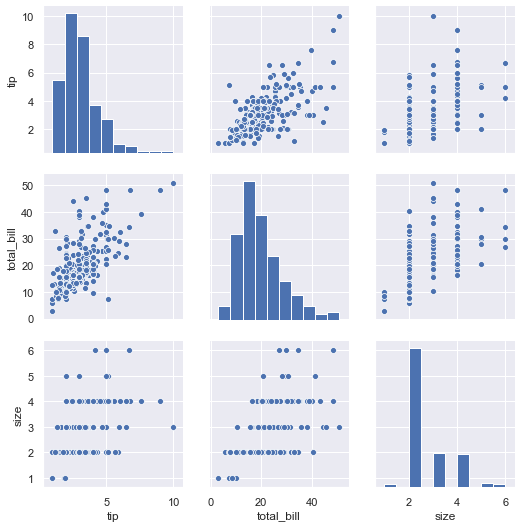

In [22]:
col = ['tip', 'total_bill', 'size'] # špecifikujeme stĺpce, pre ktoré chceme vykresľovaťmpárový graf
g = sns.pairplot(tips[col])         # zavoláme funkciu pairplot s parametrom

Úplne rovnako ako v predošlých príkladoch, aj párový graf môžeme doplniť o farebné rozlíšenie podľa hodnôt zvoleného kategorického atribútu pomocou nastavenia parametra `hue`. 

#### Úloha 9.2

Vyskúšajte podobným spôsobom ako v predchádzajúcich úlohách zobrazit párový graf pre 3 numerické atribúty datasetu `tips`, ale rozlíšený podľa hodnôt atribútu popisujúceho pohlavie (`sex`). 

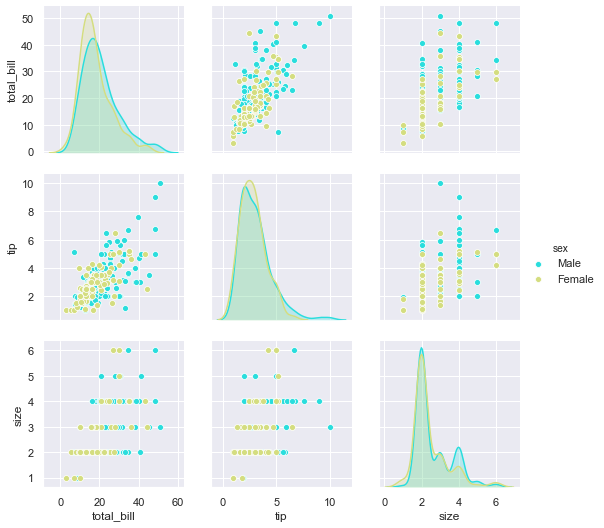

In [49]:
g = sns.pairplot(data=tips, hue='sex', palette='rainbow')

#### Vizualizácia distribúcie rozdelenia hodnôt - kategorické atribúty

Pre vizualizáciu kategorických premenných môžeme použiť viacero druhov vizualizácií. 

Medzi najjednoduššie patrí vizualizácia histogramov - početnosti rôznych hodnôt kategorických atribútov. Na jeho vizualizáciu môžeme použiť funkciu ``countplot()``. 

Funkcia má na vstupe 2 povinné parametre, ktoré umožnia tvoriť základné histogramy pre jeden atribút:
* `x` alebo `y` - stĺpec dátového rámca vizualzovaného x-ovej alebo y-ovej osi. Volíme podľa toho, či chceme graf vykresliť vodorovne, alebo zvisle.  
* `data` - zdrojový dátový rámec

Príklad nižšie zobrazí početnosť hodnôt atribútu `smoker`.

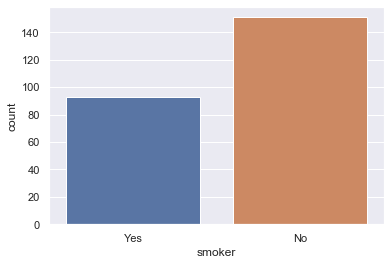

In [27]:
g = sns.countplot(x='smoker', data=tips)

Vizualizácia zobrazuje početnosti jednotlivých hodnôt daného atribútu. Funkcii vieme špecifikovať rozširujúce parametre:

* `hue` - farebné odlíšenie pomocou hodnôt špecifikovaného kategorického atribútu
* `palette` - definuje farebnú sadu (napr. ``rainbow``, ``Set1``, `Blues` alebo ``coolwarm``)

#### Úloha 9.3

Vyskúšajte si vizualizáciu `countplot()` tak, že zobrazíte počty fajčiarov aj vzhľadom na jednotlivé pohlavia. Jednotlivé stĺpce vykreslite vodorovne. 

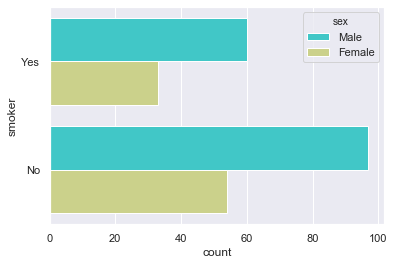

In [34]:
g = sns.countplot(y='smoker', hue='sex', palette='rainbow', data=tips)

### Vizualizácie vzájomnej závislosti 2 premenných rôznych typov

#### Stĺpcový graf

``countplot`` je v podstate zjednodušenou formou ``barplot`` grafu, ktorý vo všeobecnosti umožňuje zobraziť agregované hodnoty zvoleného numerického atribútu podľa hodnôt kategorickej premennej (štandardne je nastavená ako funkcia priemer). Vizualizácia je teda tvorená stĺpcami, ktorých výška reprezentuje priemernú hodnotu zvoleného atribútu. Navyše je táto informácia doplnená o vizualizáciu štandardnej odchýlky. 

Funkcia `barplot()` má niekoľko povinných parametrov:
* `x` - názov kategorickej premennej 
* `y` - názov numerickej premennej 
* `data` - dátový rámec vstupných dát

Rozširujúcimi parametrami vieme došpecifikovať vykresľlovanie. Napr.:

* `hue` - farebné odlíšenie pomocou hodnôt špecifikovaného kategorického atribútu
* `estimator`- môže expliticne definovať funkciu estimátora (implicitne je nastavený priemer), môžeme ale použiť aj napr. `median`, 
* `ci` - explicitne definuje odchýlku estimátora (implicitne je nastavená štandardná odchýlka, ak je nastavený na `None`, odchýlka sa nevykreslí).
* `palette` - definuje farebnú sadu 
* `order` - umožňuje nastaviť poradie v akom budú zobrazené stĺpce, napr. ['Atribut2', 'Atribut1']


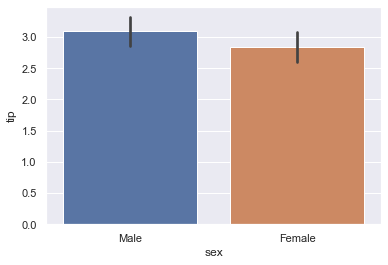

In [35]:
g = sns.barplot(x='sex',y='tip',data=tips) # Tento príkaz vizualizuje priemernú výšku sprepitného pre mužov a ženy
# tá čiarka v stĺpci určuje ako sú rozptýlené hodnoty, čím je kratšia, tým sú hodnoty bližšie k sebe.

#### Úloha 9.4. 

Vykreslite mediány výšky sprepitného v jednotlivých dňoch v týžni rozdelené podľa pohlavia.
Pozn. - prepočítanie medánu potrebujete importovať `median` funkciu z `numpy`

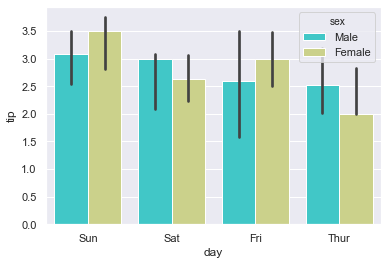

In [41]:
from numpy import median

g = sns.barplot(x='day',y='tip', hue='sex', data=tips, estimator=median, order=['Sun', 'Sat', 'Fri', 'Thur'], palette='rainbow')
# order - zmenilo poradie dní

#### Krabicový graf

Pre zobrazenie distribúcie hodnôt pre kategorické dáta môžeme použiť ``boxplot``. Vizualizuje distribúciu numerických premenných naprieč rôznymi hodnotami kategorických atribútov a zobrazuje minimálne/maximálne hodnoty, medián a kvartily. Body vykreslené mimo "box" (tzv. fliers) predstavujú outliery. 

Funkcia `boxplot()` má na vstupe rovnaké povinné parametre ako predchádzajúce funkcie:

* `x` - názov kategorickej premennej 
* `y` - názov numerickej premennej 
* `data` - dátový rámec vstupných dát


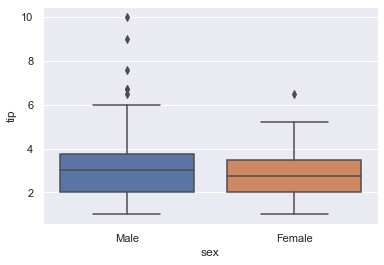

In [42]:
# Kód nižšie vykreslí rozdelenie výšky sprepitného (atribút tip) podľa pohlavia. 

g = sns.boxplot(x="sex", y="tip", data=tips)

Aj ``boxplot`` vizualizácie vieme modifikovať a rozširovať, obdobne ako v predchádzajúcich príkladoch. Podobne teda vieme definovať:

* `hue` - farebné odlíšenie pomocou hodnôt špecifikovaného kategorického atribútu
* `order` - umožňuje nastaviť poradie v akom budú zobrazené stĺpce, napr. ['Atribut2', 'Atribut1']
* `palette` - definuje farebnú sadu 


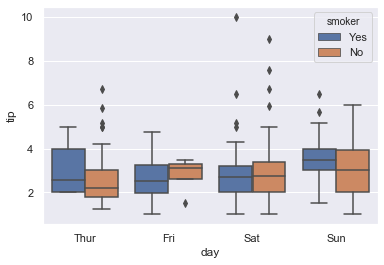

In [43]:
# Tento príklade vizualizáciu rozdelí podľa atribútu ``smoker`` pre fajčiarov/nefajčiarov.

g = sns.boxplot(x="day", y="tip", hue="smoker",data=tips)

#### Úloha 9.5 

Vyskúšatje posledný krabicový graf vykresliť aj s týmto rozširujúcimi parametrami `palette` a `order`. Prvý atribút skúšajte nastaviť napr. na ``rainbow``, ``Set1``, `Blues` alebo ``coolwarm``. Na x-ovej osi vykreslite dni v obrátenom poradí. 


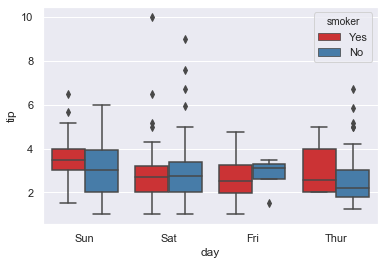

In [47]:
g = sns.boxplot(x="day", y="tip", hue="smoker",data=tips, palette="Set1", order=['Sun', 'Sat', 'Fri', 'Thur'])

Rovnako môžete vyskúšať použit rozširujúci parameter `palette` aj pri ostatných predoškých vizualizáciách (okrem `distplot() grafu`).  

In [ ]:
# YOUR CODE HERE

### Bodové grafy pre kategorické premenné

#### Strip plot

`stripplot()` funkciu je možné použiť pre vykreslenie bodového grafu (ako `scatterplot`) ale v takom prípade, kedy je jedna z premenných je kategorická. Výsledný graf potom vizualzuje záznamy a distribúciu hodnôt pre jednotlivé kategorické hodnoty.  

Medzi povniné parametre partia:

* `x` - názov kategorickej premennej 
* `y` - názov numerickej premennej 
* `data` - dátový rámec vstupných dát


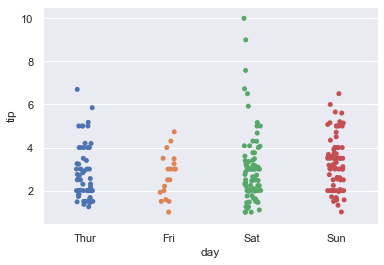

In [50]:
# Rovnaký príklad z predošlých ukážok - na os x vykreslíme hodnotu atribútu 'day'
# Na y-ovú os hodnoty atribútu 'tip', zdrojový dataset je 'tips'

g = sns.stripplot(x="day", y="tip", data=tips)

Podobne, ako v predchádzajúcich prípadoch, aj tieto vizualizácie môžeme pomocou parametra `hue`, došpecifikovať podľa hodnôt zvolenej kategorickej premennej.  

Ďalší z rozširujúcich parametrom je `jitter`. Nastavovaním hodnoty tohoto parametra môžeme špecifikovať hustotu vykreslenia. 

Tiež môžeme použiť aj parameter `palette` pre definovanie použitej farebnej palety. 

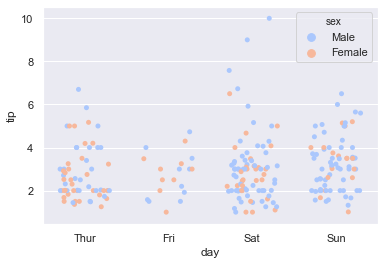

In [54]:
# Tento graf vizualizuje výšku sprepitného (tip) mužov a žien podľa jednotlivých dní v týždni (atribút day)
# Hustota vykreslenia bodov (jitter) je nastavená manuálne na 0.3 a nastavená je aj farebná paleta coolwarm

g = sns.stripplot(x="day", y="tip", hue="sex",data=tips, jitter = 0.3, palette = 'coolwarm')

Vyskúšajte nastavovať parameter `jitter` na rôzne hodnoty v intervale (0,1) a sledujte, ako to ovplyvňuje vizualizáciu. 

#### Swarm plot

Funkcia `swarmplot()` vykresľuje podobný typ grafu ako `stripplot()`. Jej použitie je teda rovnaké - pre vykreslenie bodového grafu, kde jedna z premenných je kategorická. Rozdiel je iba v samotnom vykreslení, kde sa jednotlivé body neprekrývajú. Takýto spôsob potom môže poskytnuť lepší pohľad na distribúciu hodnôt, na druhej strane pri veľkom počte záznamov nemusí byť vhodný.


#### Úloha 9.6

Vyskúšajte si teraz rovnakú vizualizáciu ako v predošlom príklade pomocou funkcie ``swarmplot``. Používa sa rovnaký spôsob špecifikácie vstupných parametrov - stĺpec dát pre os `x` a `y`, `data` pre zdrojový dátový rámec, `hue` pre kategorický atribút a `palette` pre farby.

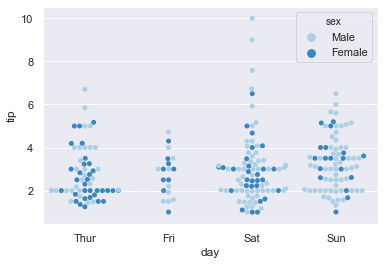

In [60]:
g = sns.swarmplot(x="day", y="tip", hue="sex",data=tips, palette='Blues')

Vizualizácie z predošlých príkladov vieme spájať dokopy a tvoriť kombinované grafy. Príklad nižšie skombinuje ``swarmplot`` a ``violinplot`` do jednej vizualizácie. 

### Kombinované vizualizácie - Facet grids

`Facet Grids` umožňujú vykresľovanie viacerých vizualizácií naraz do mriežky. Pomocou funkcie `FacetGrid()` vieme vytvoriť mriežku, ktorú vieme naplniť rôznymi vizualizáciami. 

#### Facet histogramy

Nižsie uvedený príklad demonštruje použitie funkcie na paralelné vykreslenie viacerých histogramov v závislosti na rôznych kombináciách hodnôt atribútov. 

Povedzme, že by nás zaujímalo poznať, koľko z celkového účtu nechávajú muži a ženy počas večere alebo obeda (atribút `time`). Na vizualizáciu takéhoto histogramu si najprv vytvoríme nový atribút popisujúci podiel sprepitného na celkovom účte a nazveme ho `tips_pct`.

Potom vykreslíme mriežku, kde jednotlivé riadky špecifikujeme parametrom `row` a stĺpce parametrom `col`. Ich hodnotami sú kategorické atribúty, pre ktoré sa budú v jednotlivých stĺpcoch vizualizovať jednotlivé grafy. 

Potom pomocou funkcie `map()` aplikujeme matplotlib histogram (funkcia `plt.hist`) pre zvolený atribút (v tomto prípade podiel prepitného `tip_pct`).

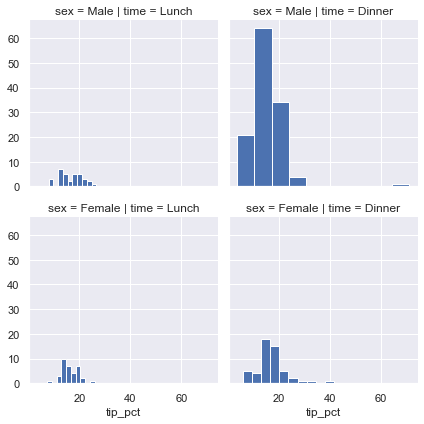

In [61]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill'] #vytvoríme nový stĺpec s hodnotou podielu sprepitného na účte

g = sns.FacetGrid(tips, row="sex", col="time") # vytvoríme mriežku, kde budú riadky podľa hodnoty pohlavia a v stĺpcoch podľa času 
g.map(plt.hist, "tip_pct")                     # vykreslíme matplotlib histogramy do mriežky

#### Vykresľovanie závislosti s treťou kategorickou premennou

Použitím funkcie `catplot()` môžeme vykresliť vizualizáciu grafov uvedených typov (pre kategorické atribúty) aj v závislosti na ďalšej dodatočnej kategorickej premennej. Funkcia umožní paralelne vedľa seba vykresliť viacero diagramov daného typu, každý pre jednu z hodnôt ďalšej kategorickej premennej. 

Funkcia `catplot()` je vlastne stĺpcový graf (rovnaký ako vo funkcii `barplot()`), avšak umožňuje vykresľovanie do `FacetGrid`-u automaticky. Vo funkcii teda môžeme priamo došpecifikovat parameter `col`, ktorý podľa hodnôt špecifikovaného atribútu v jednotlivých stĺpcoch vykreslí stĺpcové grafy pre jednotlivé hodnoty daého atribútu. 

Ako príklad môžeme uviesť vizualizáciu výšky sprepitného mužov a žien podľa jednotlivých dní v týždni rozdelených ešte podľa toho, či sú fajčiari alebo nie. Tretiu kategorickú premennú dodefinujeme pomocou parametra `col`. Parameter `kind` potom definuje štýl vykreslenia (môžeme použiť `bar`, `strip`, `point`, `swarm`). Ak použijeme hodnotu `count`, môžeme takto na y-ovú os vyniesť početnosť hodnôt atribútu na x-ovej osi. 

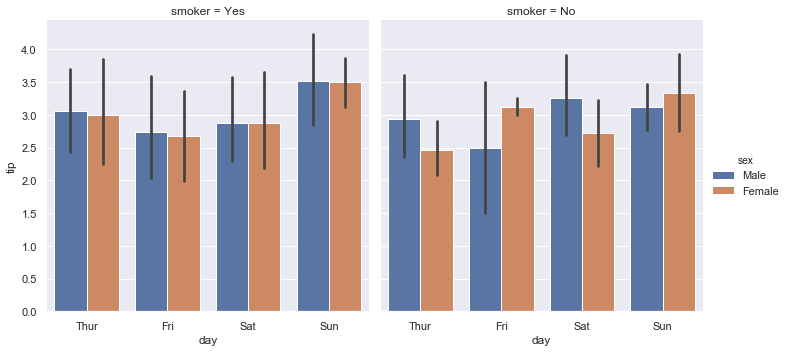

In [67]:
g = sns.catplot(x="day", y="tip", hue="sex", col="smoker", data=tips, kind="bar")

### Heatmapy

Heatmapy je možné použiť na prehľadné vykresľovanie korelácií. Korelačnú maticu numerických atribútov v dátovom rámci vypočítame pomocou `tips.corr()`. 

Samotné hodnoty korelačných koeficientov môžeme štandardne vypísať do tabuľky, alebo môžeme použiť funkciu `heatmap()` zo Seaborn knižnice, ktorá nám umožní korelačnú tabuľku zadanú ako jej parameter vizualizovať farebne. Jednotlivé farebné odtiene potom udávajú silu vzájomnej korelácie. 

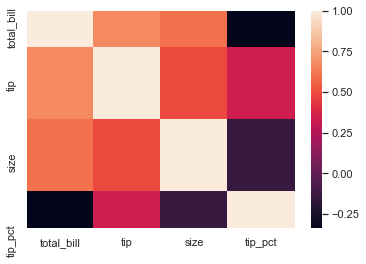

In [68]:
# Vykreslenie heatmapy pre korelačnú tabuľku rámca tips
# tips.corr() funkcia spočíta korelácie všetkých numerických atribútov dátového rámca tips

g = sns.heatmap(tips.corr())

Takto vyzerá vizualizácia heatmapy s implicitnými nastaveniami. Rovnako ako v ostatných vizualizáciách, aj tu môžeme došpecifikovať viaceré spôsoby, ako zobrazenie upraviť. Napr. zobrazovanie korelačných koeficientov riadnime parametrom `annot`, ktorý aj je nastavený na hodnotu `True`, vykreslí hodnoty korelačných koeficientov do príslušných políčok. Rovnako môžeme definovať paletu farieb pomocou parametra `cmap` (colormap). 

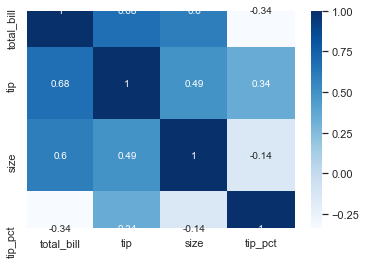

In [70]:
g = sns.heatmap(tips.corr(),cmap='Blues',annot=True)

Parametrom `mask` vieme špecifikovať políčka, ktoré sa "zamaskujú". Môžeme tak zamaskovať a nevykresliť napr. políčka s nulovými hodnotami, alebo napríklad v prípade korelačných matíc časť nad diagonálou. 

In [ ]:
mask[np.triu_indices_from(tips.corr())] = True # triu_indices_from() vráti indexy horného trojuholníka zo vstupného poľa, maska sa na nich nastaví na True
g = sns.heatmap(tips.corr(), mask=mask, annot=True, square=True) # vykreslí sa heatmapa s maskou

Heatmapy môžeme samozrejme použiť na zobrazovanie `pivot tables`. Tabuľku použijeme ako vstupný parameter a podobne ako v predošlých príkladoch nastavíme ostatnými parametrami zobrazovanie koeficientov jednotlivých políčok. Parametrom `cbar` zasa vieme nastaviť zapnutie/vypnutie farebnej stupnice.

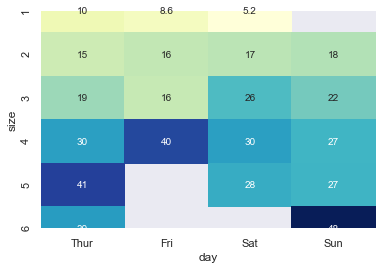

In [71]:
heatmap_data = pd.pivot_table(tips, values='total_bill', index=['size'], columns='day') # vytvoríme pivot table - hodnoty celkového účtu podľa veľkosti skupinky a dňa
g = sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu",  cbar=False)                   # vykreslíme heatmapu

Zaujímavé je použitie heatmapy pre vizualizáciu chýbajúcich hodnôt. Môžema tak rýchlo získať predstavu o tom, v akých atribútoch sa chýbajúce hodnoty vyskytujú a koľko ich je. Aby sme demonštrovali využitie, načítame si dataset Titanic, nakoľko v datasete Tips sa chýbajúce hodnoty nevyskytujú.

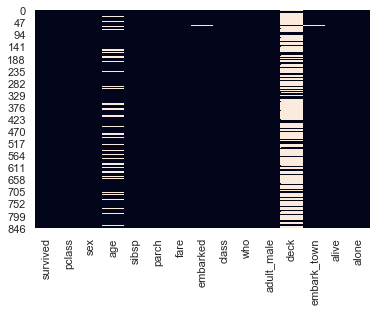

In [72]:
titanic = sns.load_dataset('titanic')   # načítame dataset Titanic z repozitáru štandardných datasetov
g = sns.heatmap(titanic.isnull(), cbar = False)   # vykreslíme heatmapu pre tie prvky dátového rámca, ktoré sú chýbajúce, bar nevykresľujeme

## Nastavenia štýlu a vykresľovania

V tejto časti si uvedieme niekoľko príkladov a ukážok toho, ako lepšie prispôsobiť vykresľovanie vizualizácií. Predošlé príklady používali štandardne prednastavený štýl Seaborn knižnice a niektoré z aspektov vykresľovania sme riadili priamo pre jednotlivé grafy použitím parametra `palette`. Seaborn umožňuje základné nastavenia štýlu realizovať jak pre jednotlivé grafy, tak aj definovať štýl jednotne, pre všetky používané vizualizácie.  

Nižšie uvedieme niekoľko ukážok, ako je možné niektoré z aspektov vizualizácie prispôsobovať.

Jednotlivé úpravy štýlu si ukážeme na príklade `distplot` zo začiatku cvičenia 

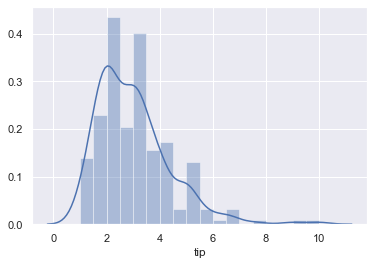

In [73]:
g = sns.distplot(tips['tip'])

Implicitne vykreslený graf je vykreslený s orámovaním, bielym pozadím. Pomocou funkcií `set()`a `set_style()` môžeme definovať štýl, ktorý potom bude používaný pre všetky grafy v skripte/notebooku. Štýl potom špecifikuje základné prvky vizualizácií - farbu osí, pozadie grafu a ostatné elementy. Nastaví sa obvykle na začiatku, pri inicializácii Seaborn. 

Funkcia `set()` umoožňuje nastavi rôzne aspekty:
* `style` - použitý štýl obrázkov (viz. štýly nižšie)
* `xlabel`, `ylablel` - popisky osí
* `palette` - použitá farebná paleta - podobne, ako sme špecifikovali pre jednotlivé grafy, môžeme definovať pre celý notebook, resp. iný kontext
* `font` - špecifikácia fontu písma v diagramoch
* `font_scale` - veľkosť písma

Funkcia `set_style()` definuje jeden konkrétny aspekt vizualizácie - štýl samotných vizualizácií. Pokrýva `style` časť nastavenia všetkých aspektov vizualizácie. Samostatne tak môžeme pre dokument nastaviť štýl. Hodnoty parametra sú:
* `darkgrid`
* `whitegrid`
* `dark`
* `white`
* `ticks`

Ak nastavíme štýl pomocou `set()` alebo `set_style()`, zmeny sa prejavia v celom kontexte (napr. dokumente). Ak chceme štýl aplikovať iba lokálne, na jeden z obrázkov, môžeme použiť funkciu `axes_style('darkgrid')` ako v úlohách nižšie.


#### Úloha 9.7

Vyskúšajte a porovnajte vizualizácie grafu distribúcie hodnôt atribútu `tip` pre rôzne hodnoty vstupného parametra funkcie.

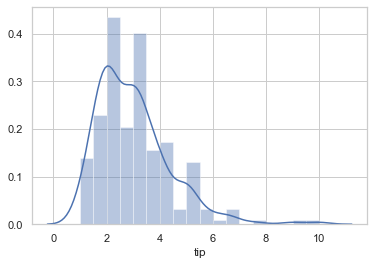

In [81]:
with sns.axes_style('whitegrid'):        # aplikujeme pomocou funkcie axes_style štýl
         g = sns.distplot(tips['tip'])  # vykreslíme graf

Pomocou funkcie `despine()` vieme odstrániť rámček okolo diagramu, resp. dodefinovať jeho rozsah s spôsob zobrazovania.

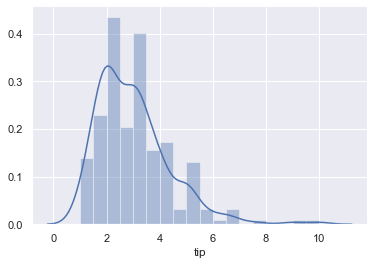

In [82]:
g = sns.distplot(tips['tip'])
g = sns.despine()

`despine()` umožňuje aj meniť vykresľovanie osí, ich rozostup, prípadne orezanie, pomocou parametrov `offset` a `trim`. Rovnako vieme špecifikovať, ktoré z ohraničení chceme odstrániť (parametrami `left`, `right`, `bottom`, `top`).

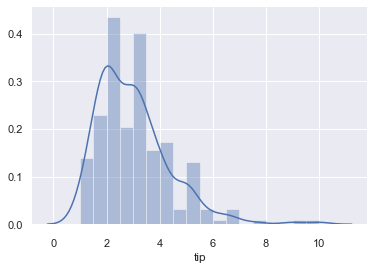

In [83]:
g = sns.distplot(tips['tip'])
g = sns.despine(offset=5, trim=True, left=True, bottom=False)

Funkcia `set_context()` zase umožní vhodne naškálovať vizualizáciu pre daný účel. V závislosti na rôznych hodnotách jej parametra sa prispôsobuje veľkosť popisiek osí, legendy, hrúbky čiar, či stupnice osí. Hodnoty parametra tejto funkcie sú `paper`, `notebook`, `talk` a `poster`. Vyskúšajte rozdiely pri vykresľovaní.

Do kontextu vieme pridávať aj ostatné aspekty, napr. veľkosť písma (`font_scale`), 

In [ ]:
sns.set_context('talk', font_scale = 1.3)
g = sns.distplot(tips['tip'])

Popisky osí môžeme špecifikovať pomocou `matplotlib`, alebo aj v Seaborn pomocou funkcie `set()`. Tá má 2 parametre pre popis x-ovej a y-ovej osi. 

In [ ]:
with sns.axes_style('whitegrid'):
    g = sns.distplot(tips['tip'])
    g.set(xlabel='deň', ylabel='distribúcia')

Nastavovanie osí, alebo titulky obrázku môžeme realizovať aj kombináciou Seaborn a matplotlib vykresľovania. Príklad nižsie demonštruje vykreslenie Seaborn grafu a následné doplnenie titulky pomocou matplotlib.

In [ ]:
g = sns.distplot(tips['tip'])
g = plt.title('Distribution plot example', fontsize=14, fontweight='bold') # ak chceme, Seaborn vieme kombinovať s matplotlib - tuto napr. použijeme funkciu title() pre vykreslenie hlavičky grafu

Farebnú paletu sme si už vyskúšali pri niektorých grafoch nastavovať pomocou separátneho parametra pri vykresľovaní. Paletu je možné nastaviť pre celý dokument príkazom `set_palette()`. Ukážeme si niekoľko farebných paliet, ktoré je možné použiť. 

In [ ]:
sns.set_palette("Dark2")
g = sns.distplot(tips['tip'])

Väčšina farebných paliet, ktoré je možné použiť:
![Colors](palettes.png)